<a href="https://colab.research.google.com/github/CSheppardCodes/Study-of-Data-Science/blob/main/Linear_Regression/StatsModelsSGDRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DatasetSelection

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSheppardCodes/MLDatasetsUCI/main/online%2Bnews%2Bpopularity/OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
df = df.drop(columns = ['url',' timedelta'])#nonpredictive

In [ ]:

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [ ]:
df.isna().sum()#check for null values

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

In [ ]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
corrmatrix = df.corr()
corrmatrix = corrmatrix.tail(1).transpose()
corrmatrix = corrmatrix.sort_values(by=[' shares'], ascending=False).head(11)
corrmatrix

,shares
shares,1.000000
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686
kw_min_avg,0.039551


1. kw_avg_avg:                    Avg. keyword (avg. shares)

2. LDA_03:                        Closeness to LDA topic 3

3. kw_max_avg:                    Avg. keyword (max. shares)

#Check for normal distribution

standardize and normalize

In [ ]:
AllVar = [' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']

PTthresholdp5 = [' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' is_weekend', ' global_subjectivity',
       ' global_rate_positive_words',
       ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']
PTthresholdp3 =[' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' is_weekend', ' global_subjectivity',
       ' global_rate_positive_words',
       ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']
X = df[PTthresholdp3]
Y = df[' shares']

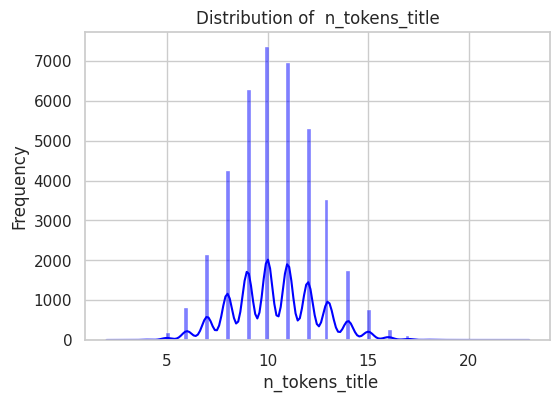

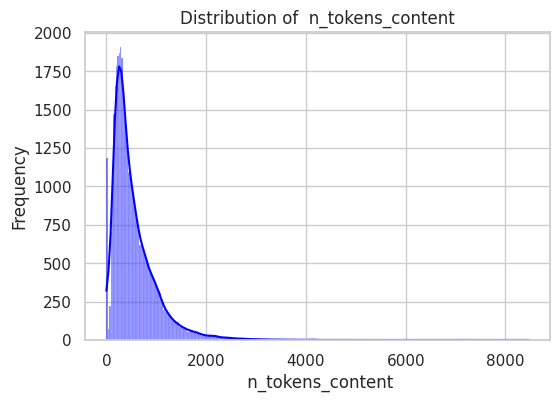

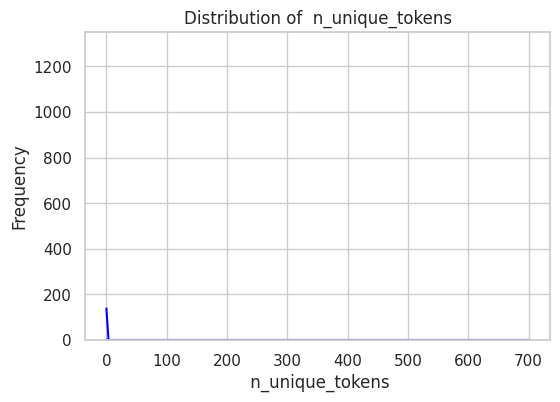

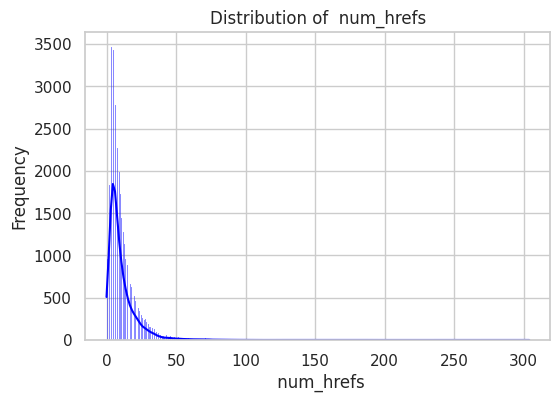

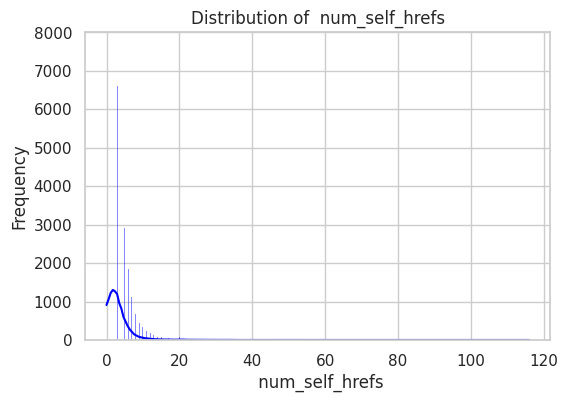

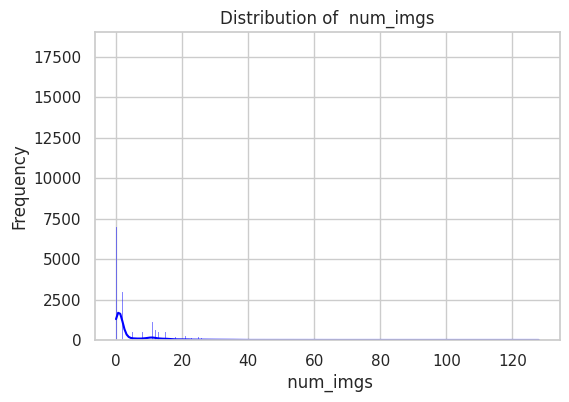

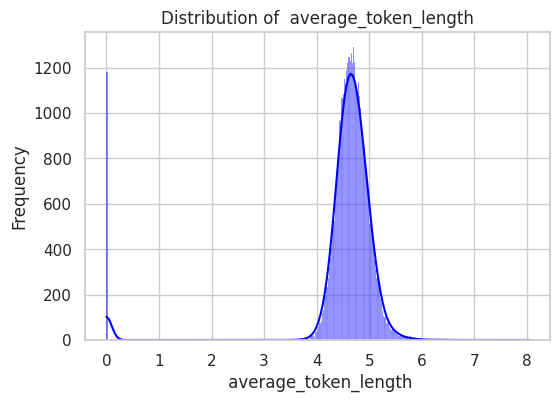

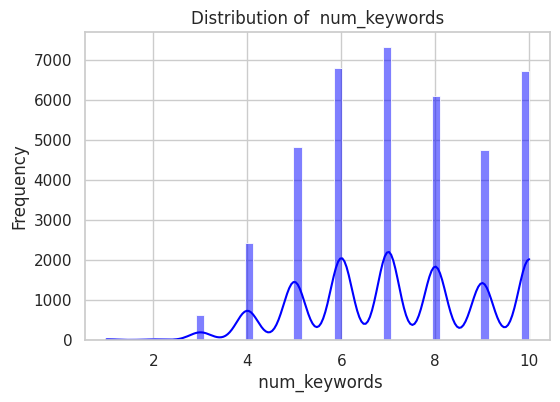

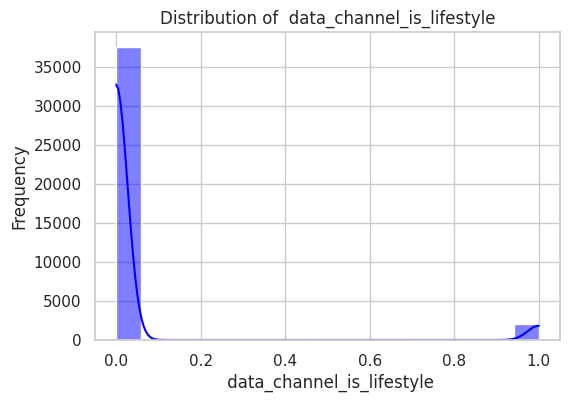

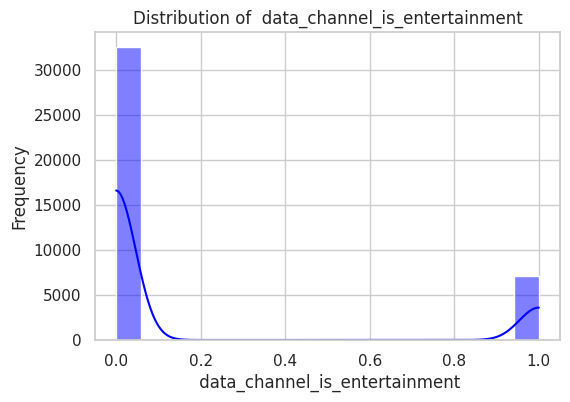

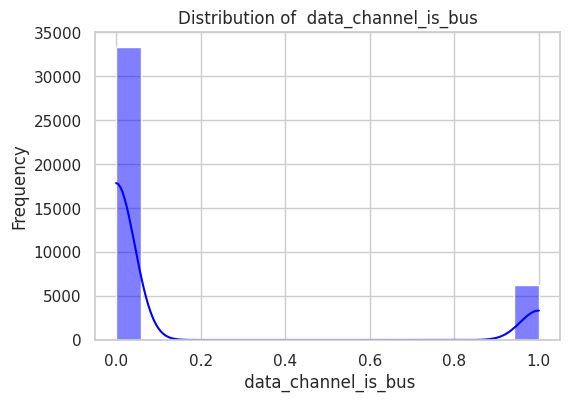

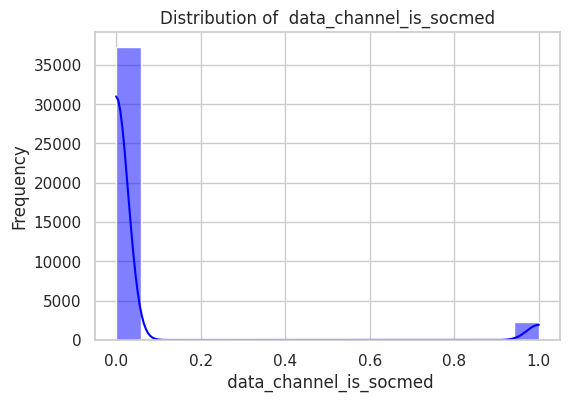

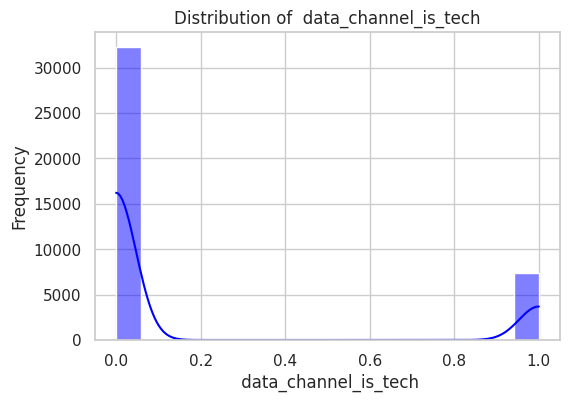

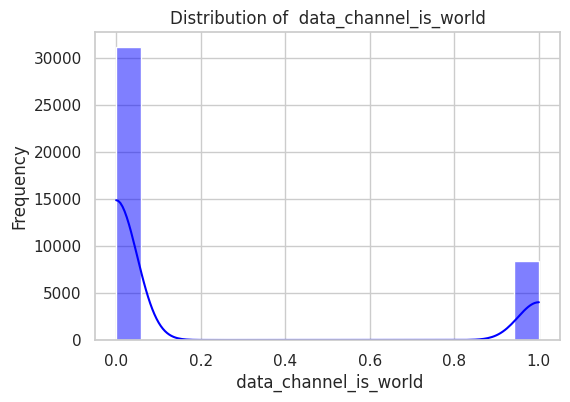

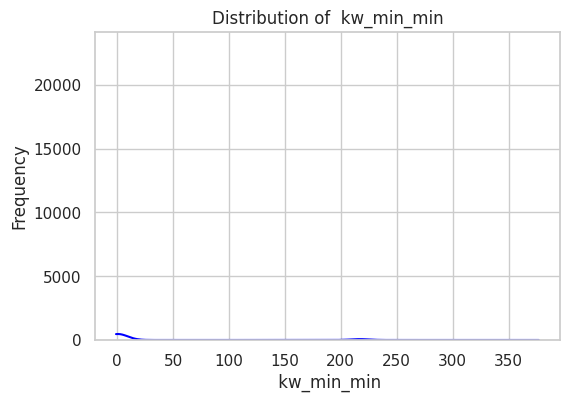

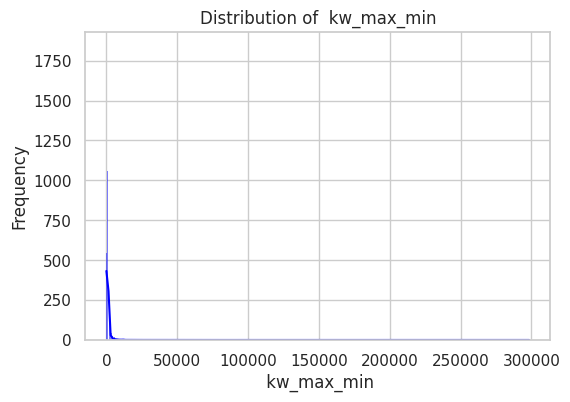

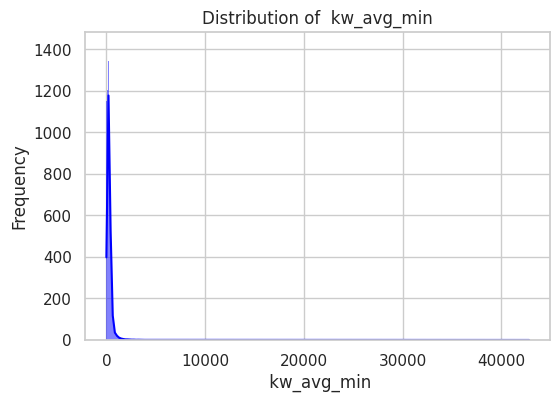

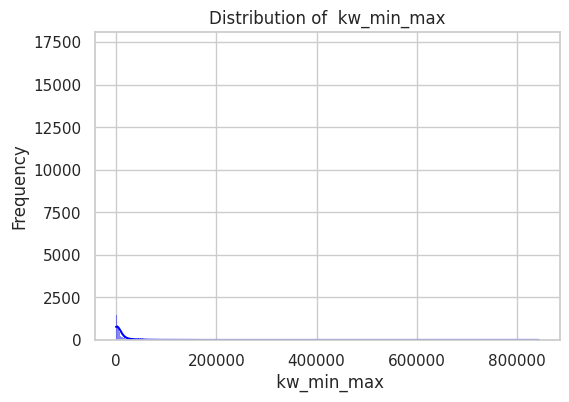

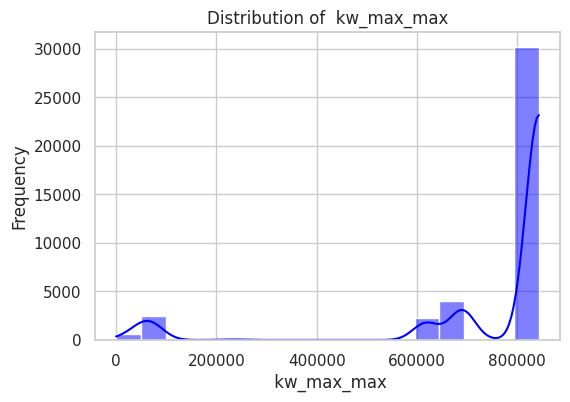

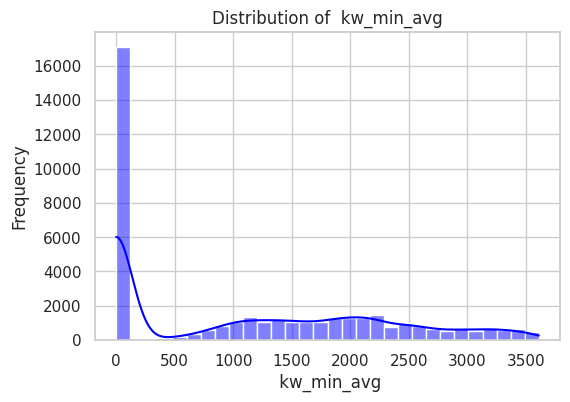

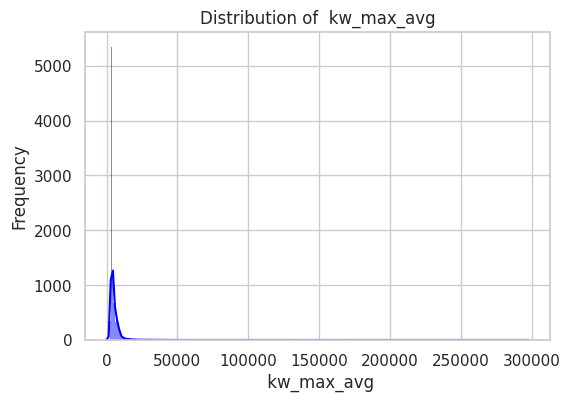

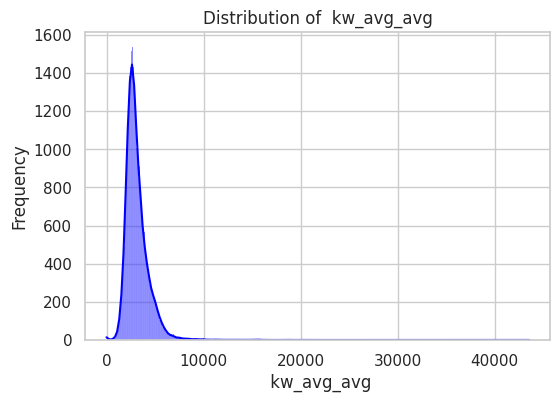

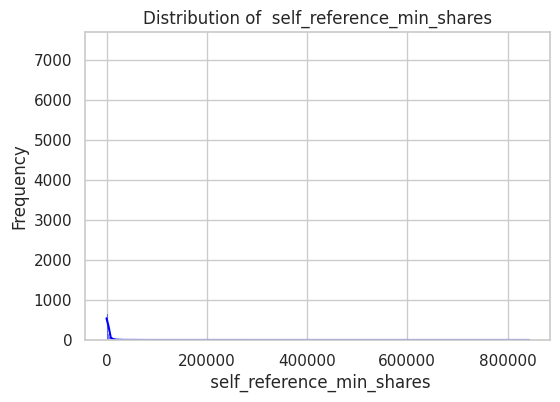

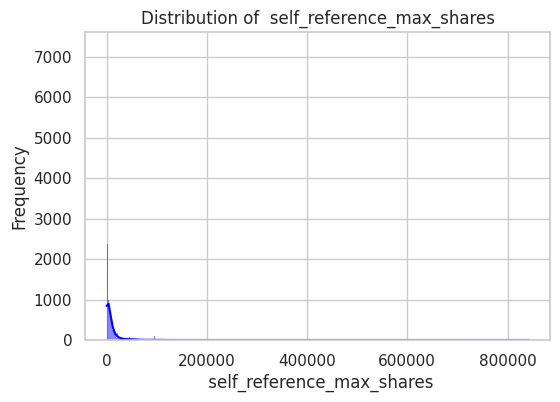

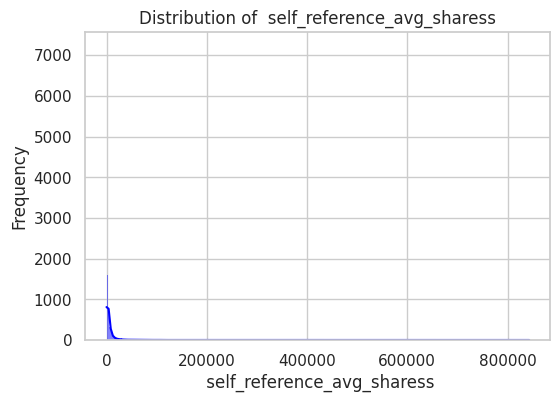

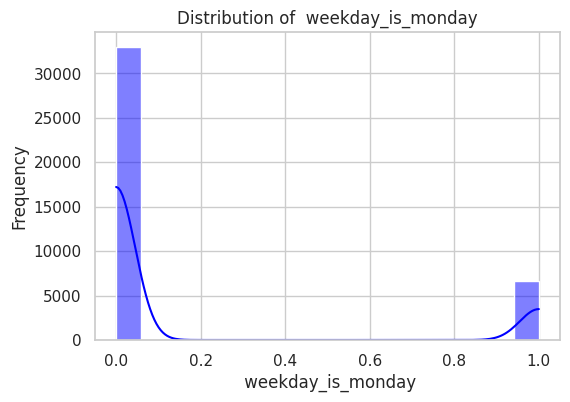

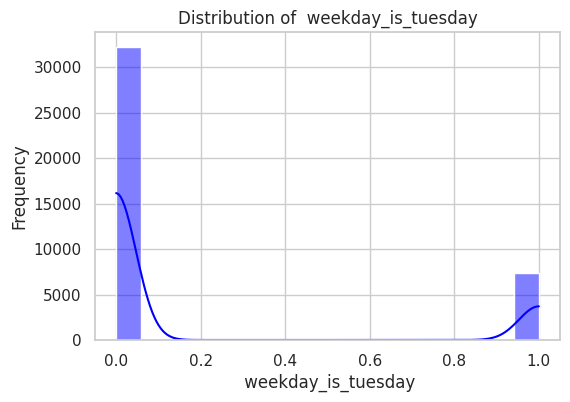

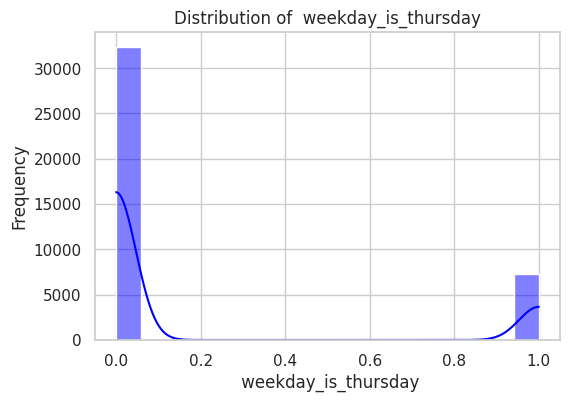

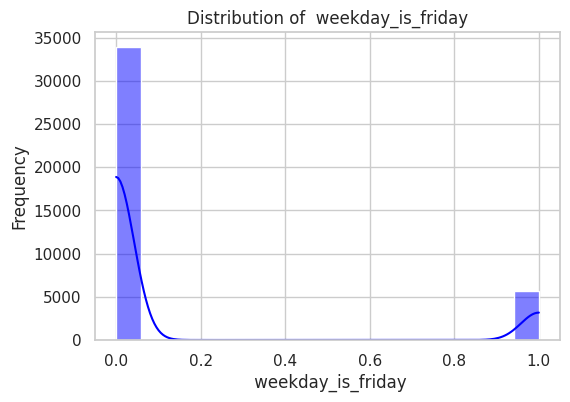

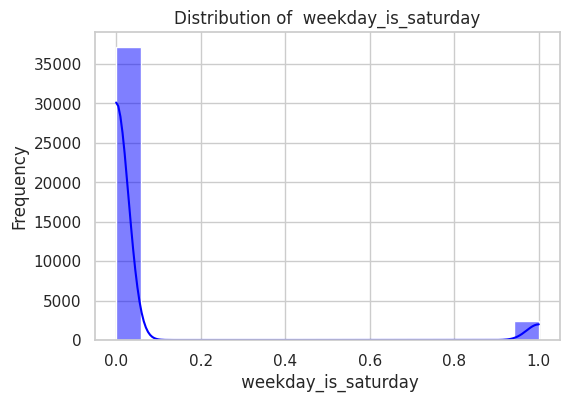

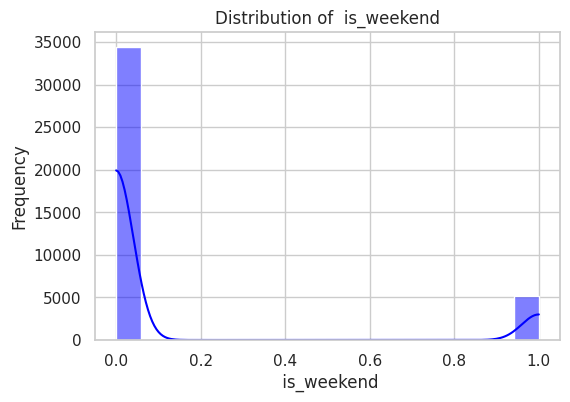

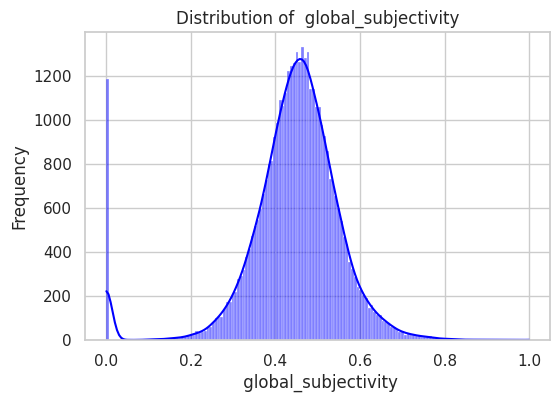

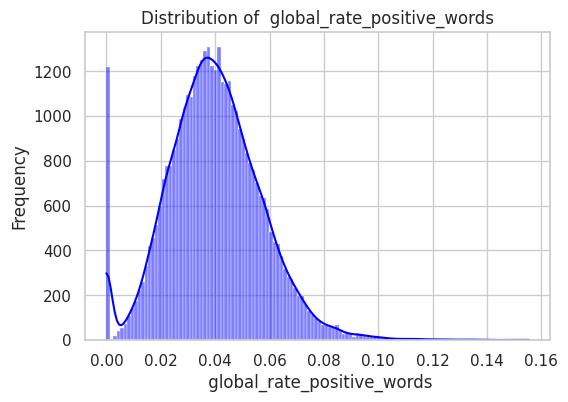

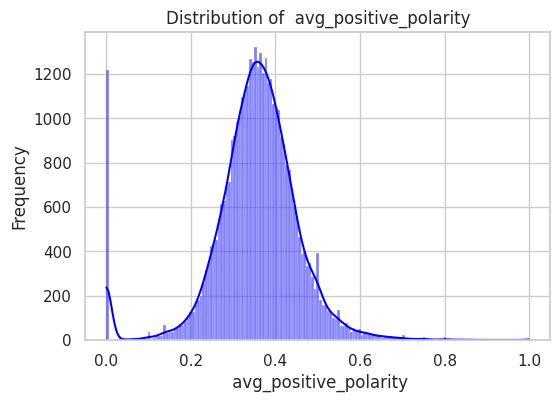

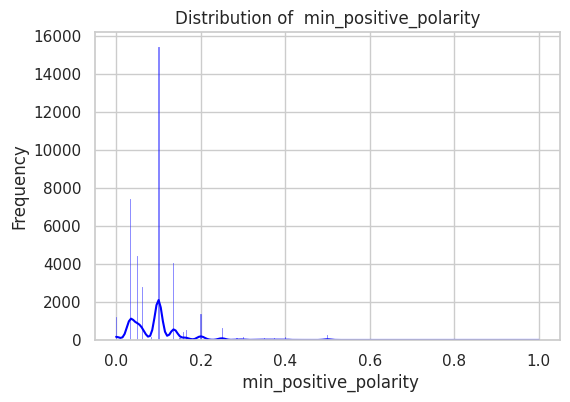

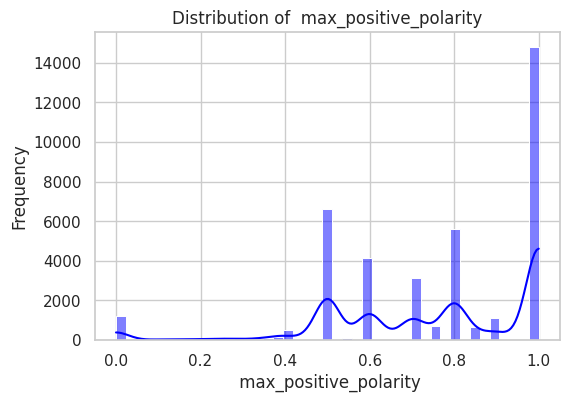

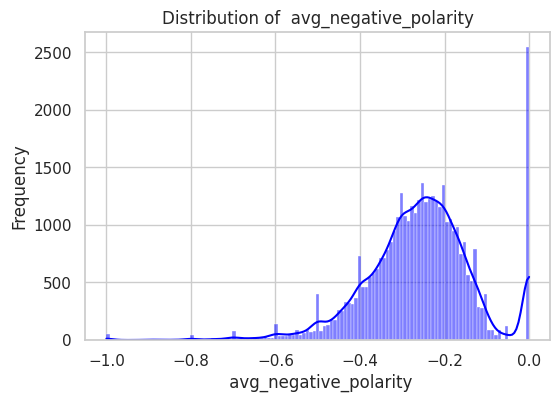

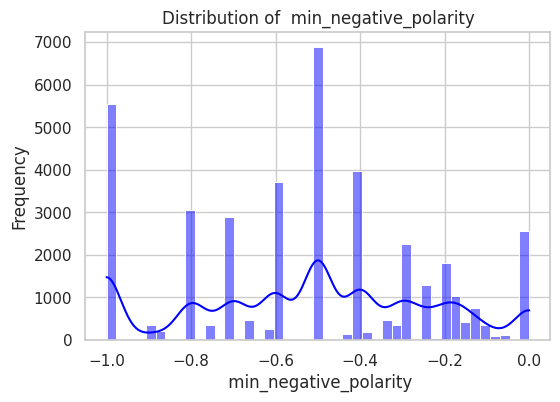

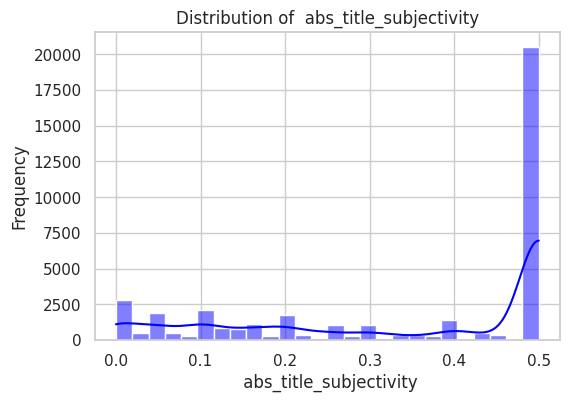

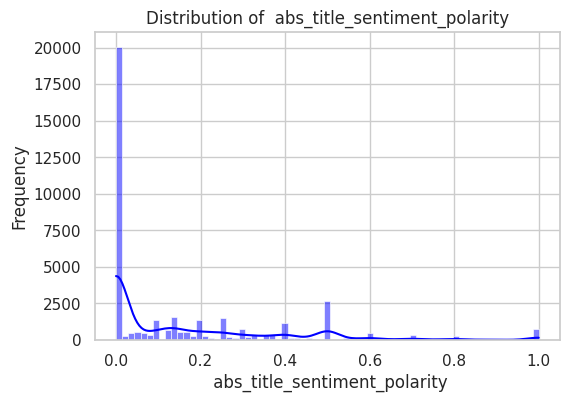

In [ ]:
# List of columns to plot
columns_to_plot = df[PTthresholdp3]

# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Create subplots for each column in the list
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# s = StandardScaler()
# #X = df.drop(columns = df.columns[-1])
# X.describe()

In [ ]:
# X = pd.DataFrame(s.fit(X).fit_transform(X), columns = X.columns)

In [ ]:
X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,is_weekend,global_subjectivity,global_rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,10.883690,3.293638,4.544143,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.183306,0.143805,0.061876,0.130915,0.443370,0.039625,0.353825,0.095446,0.756728,-0.259524,-0.521944,0.341843,0.156064
std,2.114037,471.107508,3.520708,11.332017,3.855141,8.309434,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.386922,0.350896,0.240933,0.337312,0.116685,0.017429,0.104542,0.071315,0.247786,0.127726,0.290290,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,4.000000,1.000000,1.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396167,0.028384,0.306244,0.050000,0.600000,-0.328383,-0.700000,0.166667,0.000000
50%,10.000000,409.000000,0.539226,8.000000,3.000000,1.000000,4.664082,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,660.000000,235.500000,1400.000000,843300.000000,1023.635611,4355.688836,2870.074878,1200.000000,2800.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453457,0.039023,0.358755,0.100000,0.800000,-0.253333,-0.500000,0.500000,0.000000
75%,12.000000,716.000000,0.608696,14.000000,4.000000,4.000000,4.854839,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1000.000000,357.000000,7900.000000,843300.000000,2056.781032,6019.953968,3600.229564,2600.000000,8000.000000,5200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508333,0.050279,0.411428,0.100000,1.000000,-0.186905,-0.300000,0.500000,0.250000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,8.041534,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,3613.039819,298400.000000,43567.659946,843300.000000,843300.000000,843300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.155488,1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn.datasets._california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline


<ipython-input-38-7a0570742b4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' n_tokens_title'])


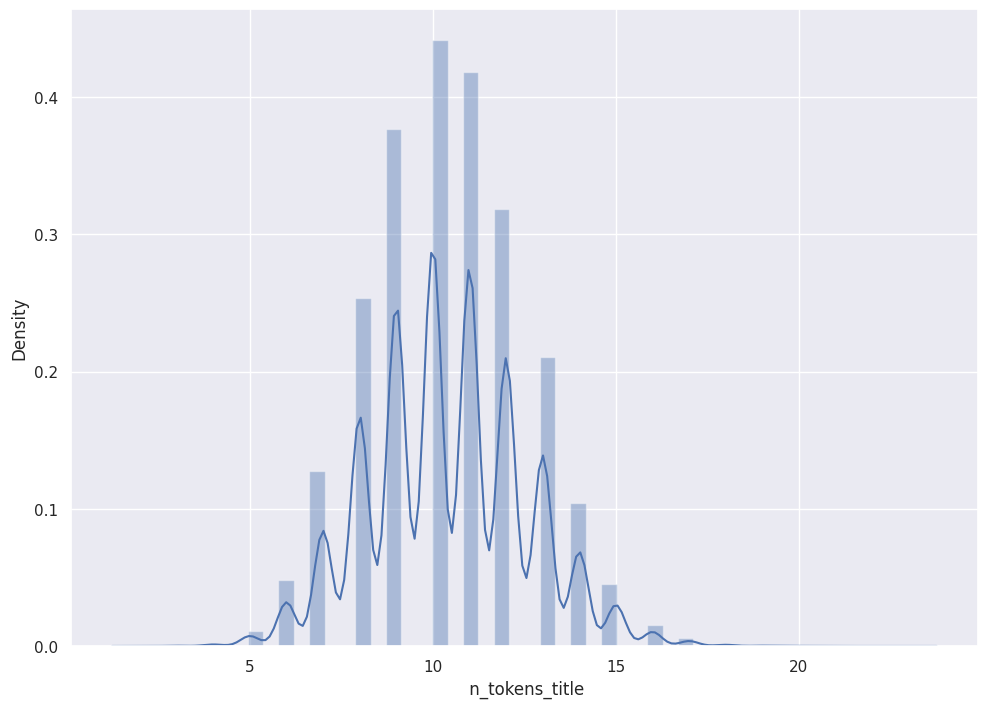

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df[' n_tokens_title'])
plt.show()

Aretheattributesnormallydistributed?Ifnot,whatcouldbethereason? •Standardizeandnormalizetheattributes. •Findhowtheattributesarecorrelatedtoeachotherandthetargetvariable.Perform numericalandvisualanalysisandoutputplotsandresults. •Identifyafewimportantattributesandproceedforward.Donotuseallattributes blindly. •Splitthedataintotrainingandtestingparts.Theratioisuptoyou.

# SGD REGRESSOR
use top 10 coor features

In [ ]:
phase1SGD = [' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' self_reference_avg_sharess',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' num_hrefs',
 ' kw_avg_max',
 ' kw_min_avg',
 ' num_imgs']
phase2SGD= [' n_tokens_title',
 ' num_hrefs',
 ' num_self_hrefs',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' weekday_is_monday',
 ' is_weekend',
 ' global_subjectivity',
 ' kw_min_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[phase2SGD], Y, test_size = 0.2, random_state=5)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(31715, 11)
(7929, 11)
(31715,)
(7929,)


In [ ]:
# 0. Default Learning Rate: Default inverse scaling learning rate (eta0=0.01 and power_t=0.25).
SGDR = SGDRegressor()#learningrate,maximumiterations,loss,penalty

# # 1. Constant Learning Rate: Fixed learning rate throughout training.
# SGDR = SGDRegressor(learning_rate='constant', eta0=0.02)  # eta0 is the initial learning rate.

# # 2. Optimal Learning Rate: Automatically adjusts learning rate based on alpha parameter.
# SGDR = SGDRegressor(learning_rate='optimal', alpha=0.0001)  # alpha multiplies the regularization term.

# # 3. Inverse Scaling Learning Rate: Learning rate decreases progressively.
# SGDR = SGDRegressor(learning_rate='invscaling', eta0=0.02, power_t=0.25)
# # eta0 is the initial learning rate, and power_t is the exponent for inverse scaling.

# # 4. Inverse Scaling Learning Rate: Learning rate decreases progressively.
# SGDR = SGDRegressor(learning_rate='invscaling', eta0=0.02, power_t=0.1)

# # 5. Inverse Scaling Learning Rate: Learning rate decreases progressively.
# SGDR = SGDRegressor(learning_rate='invscaling', eta0=0.02, power_t=0.5)

# # 6. Adaptive Learning Rate: Learning rate adapts to training progress.
# SGDR = SGDRegressor(learning_rate='adaptive', eta0=0.01)

# # 7. max_iter int, default=1000
# SGDR = SGDRegressor(max_iter = 500)

# # 8. max_iter int, default=1000
# SGDR = SGDRegressor(max_iter = 5000)

# # 9. lossstr: default=’squared_error’
# SGDR = SGDRegressor(loss = 'huber')#bad

# # 10. lossstr: default=’squared_error’
# SGDR = SGDRegressor(loss = 'epsilon_insensitive')#terrible

# # 11. lossstr: default=’squared_error’
# SGDR = SGDRegressor(loss = 'squared_epsilon_insensitive')#good

# # 11. penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
# SGDR = SGDRegressor(penalty = 'l1')#ok

# # 12. penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
# SGDR = SGDRegressor(penalty = 'elasticnet')#ok

# eta0 is the initial learning rate; adaptation depends on the training loss.
SGDR.fit(X_train, Y_train)

SGDRegressor()

In [ ]:
# model evaluation for training set
y_train_predict = SGDR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
#

In [ ]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 2.0238699423440614e+17
R2 score is -2.7867549987808254e+26




In [ ]:
# model evaluation for testing set
y_test_predict = SGDR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

In [ ]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 2.312883290380878e+17
R2 score is -6.080052030572628e+26


# OLS library

In [ ]:
#-----------for more in-depth diagnostics ----------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)

model = smRegression.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     50.44
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          6.35e-111
Time:                        00:53:45   Log-Likelihood:            -3.4294e+05
No. Observations:               31715   AIC:                         6.859e+05
Df Residuals:                   31703   BIC:                         6.860e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       